In [1]:
import pandas as pd
import numpy as np
import os 
import math

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl
import seaborn as sns 

import platform

In [2]:
if platform.processor() == 'arm':
    font_family = 'Times'
else:
    font_family = 'Ubuntu'

plot_params = {
    'font.family': font_family,
    'font.weight': 'light',
    
    'figure.figsize': (5,5),
    'figure.frameon': False, 
    'figure.titlesize': 'xx-large',
    'figure.titleweight': 'normal',
    
    'axes.titlesize': 'large',
    'axes.titlecolor': 'black',
    'axes.titleweight': 'normal',
    'axes.titlelocation': 'center',
    'axes.labelsize': 'x-large',
    
    'grid.alpha': .25, 
    'legend.frameon':False,
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
}

pylab.rcParams.update(plot_params)
sns.set_palette('mako')

In [3]:
data_folder = 'data'
train_data_fname = 'train.csv'
test_data_fname = 'test.csv'
external_data_fname = 'external_data.csv'
sample_submission_fname = 'sample_submission.csv'

train_data_path = os.path.join(data_folder, train_data_fname)
test_data_path = os.path.join(data_folder, test_data_fname)
external_data_path = os.path.join(data_folder, external_data_fname)
sample_data_path = os.path.join(data_folder, sample_submission_fname)

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
external_data = pd.read_csv(external_data_path)
sample_data = pd.read_csv(sample_data_path)

In [4]:
train_data.shape, test_data.shape, external_data.shape

((15289, 18), (10194, 17), (777, 18))

In [5]:
train_data.drop(['id'], axis=1, inplace=True)
external_data.drop('Row#', axis=1, inplace = True)

train_data['is_external'] = 0 
external_data['is_external'] = 1
test_data['is_external'] = 0

train_data = pd.concat([train_data, external_data], axis=0)

In [6]:
train_data.columns = train_data.columns.str.lower()
test_data.columns = test_data.columns.str.lower()


In [7]:
train_data.shape

(16066, 18)

In [8]:
train_data

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield,is_external
0,25.0,0.500,0.250,0.750,0.500,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.425011,0.417545,32.460887,4476.811460,0
1,25.0,0.500,0.250,0.500,0.500,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.444908,0.422051,33.858317,5548.122010,0
2,12.5,0.250,0.250,0.630,0.630,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.552927,0.470853,38.341781,6869.777600,0
3,12.5,0.250,0.250,0.630,0.500,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.565976,0.478137,39.467561,6880.775900,0
4,25.0,0.500,0.250,0.630,0.630,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.579677,0.494165,40.484512,7479.934170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335,1
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842,1
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624,1
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735,1


In [9]:
TARGET_COLUMN = 'yield'
FEATURE_COLUMNS = train_data.columns.drop('yield').to_numpy()

In [10]:
print(FEATURE_COLUMNS.shape)
FEATURE_COLUMNS

(17,)


array(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'maxofuppertrange', 'minofuppertrange', 'averageofuppertrange',
       'maxoflowertrange', 'minoflowertrange', 'averageoflowertrange',
       'rainingdays', 'averagerainingdays', 'fruitset', 'fruitmass',
       'seeds', 'is_external'], dtype=object)

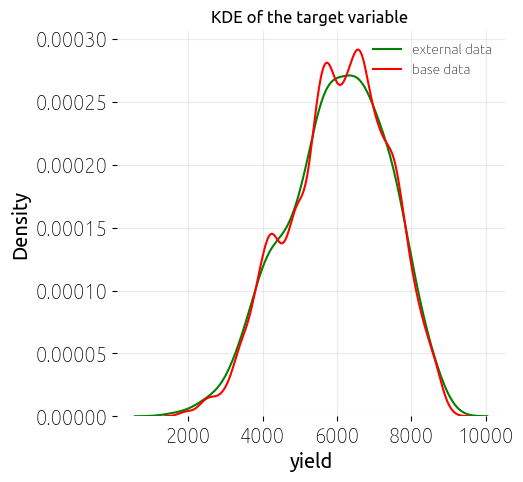

In [11]:
sns.kdeplot(train_data.loc[train_data.is_external == 1].loc[:,TARGET_COLUMN], label = 'external data', color = 'green')
sns.kdeplot(train_data.loc[train_data.is_external == 0].loc[:,TARGET_COLUMN], label = 'base data', color = 'red')
plt.title(label = 'KDE of the target variable ')
plt.legend()
plt.box()
plt.grid(.05)

In [12]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
clonesize,16066.0,19.659374,6.618134,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,16066.0,0.390660,0.413259,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,16066.0,0.286556,0.060249,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,16066.0,0.491522,0.148849,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,16066.0,0.590890,0.141209,0.000000,0.500000,0.630000,0.750000,0.750000
maxofuppertrange,16066.0,82.175072,9.148725,69.700000,77.400000,86.000000,86.000000,94.600000
minofuppertrange,16066.0,49.674599,5.548630,39.000000,46.800000,52.000000,52.000000,57.200000
averageofuppertrange,16066.0,68.659486,7.643286,58.200000,64.700000,71.900000,71.900000,79.000000
maxoflowertrange,16066.0,59.233400,6.612254,50.200000,55.800000,62.000000,62.000000,68.200000
minoflowertrange,16066.0,28.661988,3.195960,24.300000,27.000000,30.000000,30.000000,33.000000


In [112]:
train_data.nunique()

clonesize                  6
honeybee                   7
bumbles                   12
andrena                   17
osmia                     16
maxofuppertrange           6
minofuppertrange           5
averageofuppertrange       5
maxoflowertrange           6
minoflowertrange           7
averageoflowertrange       5
rainingdays                6
averagerainingdays         8
fruitset                1526
fruitmass               1515
seeds                   2067
yield                   1470
is_external                2
dtype: int64

In [120]:
low_cardinality_features = (train_data.drop(['yield', 'is_external'], axis = 1).nunique() < 10)
low_cardinality_features = low_cardinality_features[low_cardinality_features]
low_cardinality_features = low_cardinality_features.index.tolist()
low_cardinality_features

['clonesize',
 'honeybee',
 'maxofuppertrange',
 'minofuppertrange',
 'averageofuppertrange',
 'maxoflowertrange',
 'minoflowertrange',
 'averageoflowertrange',
 'rainingdays',
 'averagerainingdays']

In [124]:
mid_cardinality_features = ((train_data.drop(['yield', 'is_external'], axis = 1).nunique() > 10) & (train_data.drop(['yield', 'is_external'], axis = 1).nunique() < 20))
mid_cardinality_features = mid_cardinality_features[mid_cardinality_features]
mid_cardinality_features = mid_cardinality_features.index.tolist()
mid_cardinality_features

['bumbles', 'andrena', 'osmia']

In [127]:
continuous_features = (train_data.drop(['yield', 'is_external'], axis = 1).nunique() > 20)
continuous_features = continuous_features[continuous_features]
continuous_features = continuous_features.index.tolist()
continuous_features

['fruitset', 'fruitmass', 'seeds']

In [128]:
assert len(low_cardinality_features) + len(mid_cardinality_features) + len(continuous_features) + 2 == train_data.shape[1]

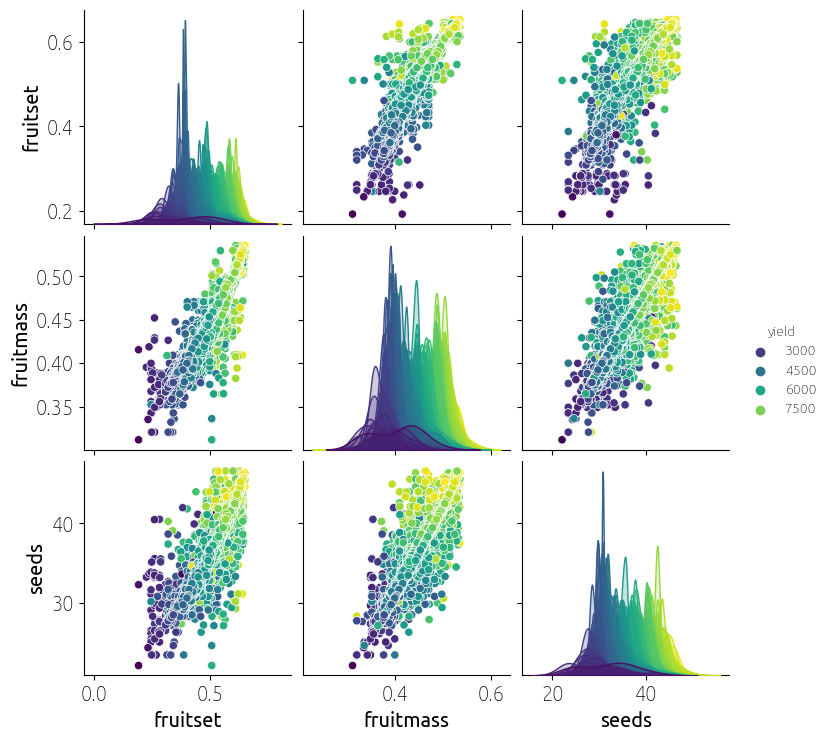

In [14]:
sns.pairplot(train_data.loc[:,['fruitset', 'fruitmass', 'seeds', 'yield']],hue = 'yield',  palette = 'viridis')

In [15]:
# sns.pairplot(train_data, hue = 'yield',  palette = 'viridis')

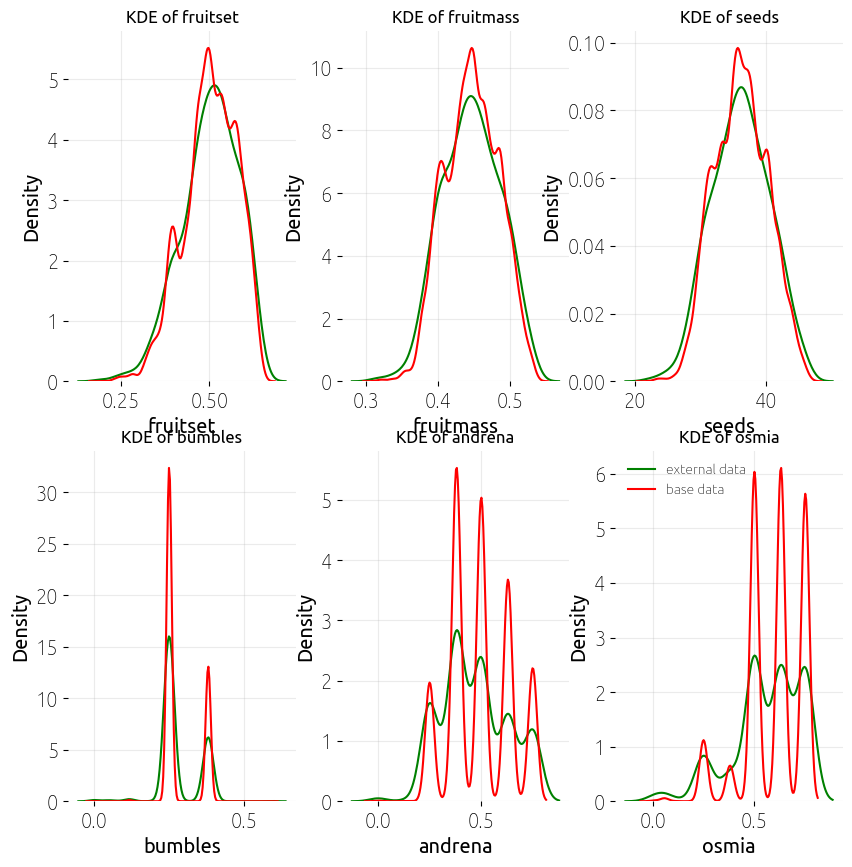

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (10,10))
axs = axs.flatten()
for column, ax in zip(['fruitset', 'fruitmass', 'seeds', 'bumbles', 'andrena', 'osmia'], axs):
    sns.kdeplot(train_data.loc[train_data.is_external == 1].loc[:,column], label = 'external data', color = 'green',  ax = ax)
    sns.kdeplot(train_data.loc[train_data.is_external == 0].loc[:,column], label = 'base data', color = 'red',   ax = ax).set_title(f'KDE of {column}')
    ax.set_frame_on(False)
    ax.grid(.3)
plt.legend()